# Neural Net to Classify Fetal Health

Note: The resources used while building this model are as follows:
1. https://machinelearningmastery.com/multi-class-classification-tutorial-keras-deep-learning-library/

# Imports

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb

# Data

In [3]:
data = pd.read_csv("./fetal_health.csv")

encoder = LabelEncoder()
encoder.fit(data["fetal_health"])
encodedY = encoder.transform(data["fetal_health"])
dummy_y = np_utils.to_categorical(encodedY)

print(dummy_y)

data.head()
data.describe()

[[0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Scaling

In [4]:
scaler = StandardScaler()

scaler.fit(data.drop('fetal_health', axis=1))
scaled_features = scaler.transform(data.drop('fetal_health', axis=1))

data_features = pd.DataFrame(scaled_features, columns = data.columns[:-1])
data_features.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,-1.352220,-0.822388,-0.20321,-1.482465,-0.638438,-0.057476,-0.268754,1.513190,-0.943095,1.802542,...,-0.165507,-1.068562,-2.119592,-0.701397,-0.458444,-1.065614,0.153270,-1.181642,1.870569,1.112980
1,-0.132526,0.730133,-0.20321,0.554627,0.375243,-0.057476,-0.268754,-1.744751,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.655137,0.958201,0.216638,0.089126,0.132038,-0.234998,-0.524526
2,-0.030884,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,0.868841,-0.535361,...,1.529124,-0.865539,1.893794,0.316003,0.958201,0.216638,0.024982,-0.006244,-0.200481,-0.524526
3,0.070757,-0.046128,-0.20321,1.233657,0.375243,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,2.350804,-0.458444,-0.027600,-0.039162,-0.075385,-0.200481,1.112980
4,-0.132526,0.988886,-0.20321,1.233657,-0.638438,-0.057476,-0.268754,-1.802928,1.208579,-0.535361,...,1.195333,-1.373097,0.333033,1.672537,-0.458444,-0.027600,0.089126,-0.006244,-0.269516,1.112980


# Create Model

In [5]:
model = keras.models.Sequential()

model.add(keras.Input(shape=(21,)))
model.add(layers.Dense(21, activation="relu"))
model.add(layers.Dense(42, activation="relu"))
model.add(layers.Dense(21, activation="relu"))
model.add(layers.Dense(3, activation="softmax"))

model.summary()

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 21)                462       
_________________________________________________________________
dense_1 (Dense)              (None, 42)                924       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                903       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 66        
Total params: 2,355
Trainable params: 2,355
Non-trainable params: 0
_________________________________________________________________


# Training

In [6]:
# Split out train data, 80%, and the rest, 20%
X_train, X_rest, Y_train, Y_rest = train_test_split(data_features, dummy_y, test_size=0.20, random_state=33)
# Spit out validate data, 15% (of total, 75% of X_rest), and test, 5% (of total, 25% of rest)
X_validate, X_test, Y_validate, Y_test = train_test_split(X_rest, Y_rest, test_size=0.25, random_state=37)

training = model.fit(X_train, Y_train, batch_size=128, verbose=1, epochs=1000, validation_data=(X_validate,Y_validate))

score = model.evaluate(X_validate, Y_validate, verbose=0, batch_size=32)

print("Validate loss:", score[0])
print("Validate accuracy:", score[1])

Epoch 1/1000
14/14 [==============================] - 0s 26ms/step - loss: 1.0965 - accuracy: 0.3465 - val_loss: 1.0218 - val_accuracy: 0.5831
Epoch 2/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.9707 - accuracy: 0.6847 - val_loss: 0.9051 - val_accuracy: 0.7931
Epoch 3/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.8759 - accuracy: 0.7641 - val_loss: 0.8150 - val_accuracy: 0.8025
Epoch 4/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.8047 - accuracy: 0.7753 - val_loss: 0.7470 - val_accuracy: 0.8056
Epoch 5/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.7532 - accuracy: 0.7735 - val_loss: 0.6993 - val_accuracy: 0.8056
Epoch 6/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.7167 - accuracy: 0.7735 - val_loss: 0.6634 - val_accuracy: 0.8056
Epoch 7/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.6883 - accuracy: 0.7741 - val_loss: 0.6342 - val_accuracy: 0.8056
Epoc

14/14 [==============================] - 0s 5ms/step - loss: 0.2814 - accuracy: 0.8947 - val_loss: 0.2684 - val_accuracy: 0.8903
Epoch 59/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2795 - accuracy: 0.8953 - val_loss: 0.2670 - val_accuracy: 0.8871
Epoch 60/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2781 - accuracy: 0.8959 - val_loss: 0.2648 - val_accuracy: 0.8903
Epoch 61/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2764 - accuracy: 0.8959 - val_loss: 0.2632 - val_accuracy: 0.8903
Epoch 62/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2749 - accuracy: 0.8971 - val_loss: 0.2621 - val_accuracy: 0.8903
Epoch 63/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2736 - accuracy: 0.8959 - val_loss: 0.2621 - val_accuracy: 0.8840
Epoch 64/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2722 - accuracy: 0.8965 - val_loss: 0.2612 - val_accuracy: 0.8871
Epoch 65/1000

14/14 [==============================] - 0s 4ms/step - loss: 0.2319 - accuracy: 0.9047 - val_loss: 0.2373 - val_accuracy: 0.8903
Epoch 116/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2318 - accuracy: 0.9041 - val_loss: 0.2386 - val_accuracy: 0.8934
Epoch 117/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2310 - accuracy: 0.9035 - val_loss: 0.2371 - val_accuracy: 0.8934
Epoch 118/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2303 - accuracy: 0.9041 - val_loss: 0.2377 - val_accuracy: 0.8934
Epoch 119/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2297 - accuracy: 0.9041 - val_loss: 0.2372 - val_accuracy: 0.8934
Epoch 120/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2293 - accuracy: 0.9041 - val_loss: 0.2367 - val_accuracy: 0.8934
Epoch 121/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2286 - accuracy: 0.9041 - val_loss: 0.2362 - val_accuracy: 0.8934
Epoch 1

Epoch 172/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2056 - accuracy: 0.9153 - val_loss: 0.2236 - val_accuracy: 0.8997
Epoch 173/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2052 - accuracy: 0.9153 - val_loss: 0.2242 - val_accuracy: 0.8997
Epoch 174/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2046 - accuracy: 0.9153 - val_loss: 0.2245 - val_accuracy: 0.8997
Epoch 175/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2040 - accuracy: 0.9171 - val_loss: 0.2248 - val_accuracy: 0.8966
Epoch 176/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2034 - accuracy: 0.9165 - val_loss: 0.2249 - val_accuracy: 0.8966
Epoch 177/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.2031 - accuracy: 0.9159 - val_loss: 0.2249 - val_accuracy: 0.8966
Epoch 178/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.2028 - accuracy: 0.9165 - val_loss: 0.2240 - val_accuracy:

Epoch 229/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1855 - accuracy: 0.9247 - val_loss: 0.2153 - val_accuracy: 0.9028
Epoch 230/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1854 - accuracy: 0.9259 - val_loss: 0.2146 - val_accuracy: 0.9028
Epoch 231/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1850 - accuracy: 0.9241 - val_loss: 0.2149 - val_accuracy: 0.9060
Epoch 232/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1849 - accuracy: 0.9241 - val_loss: 0.2141 - val_accuracy: 0.9091
Epoch 233/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1844 - accuracy: 0.9235 - val_loss: 0.2125 - val_accuracy: 0.9060
Epoch 234/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1838 - accuracy: 0.9247 - val_loss: 0.2117 - val_accuracy: 0.9060
Epoch 235/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1839 - accuracy: 0.9241 - val_loss: 0.2128 - val_accuracy:

Epoch 286/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.1703 - accuracy: 0.9294 - val_loss: 0.2061 - val_accuracy: 0.9122
Epoch 287/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1697 - accuracy: 0.9288 - val_loss: 0.2101 - val_accuracy: 0.9154
Epoch 288/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.1702 - accuracy: 0.9300 - val_loss: 0.2065 - val_accuracy: 0.9091
Epoch 289/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1692 - accuracy: 0.9282 - val_loss: 0.2092 - val_accuracy: 0.9122
Epoch 290/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1696 - accuracy: 0.9306 - val_loss: 0.2050 - val_accuracy: 0.9122
Epoch 291/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1692 - accuracy: 0.9306 - val_loss: 0.2045 - val_accuracy: 0.9122
Epoch 292/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1687 - accuracy: 0.9282 - val_loss: 0.2054 - val_accuracy

Epoch 343/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1578 - accuracy: 0.9324 - val_loss: 0.2003 - val_accuracy: 0.9154
Epoch 344/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.1575 - accuracy: 0.9306 - val_loss: 0.2006 - val_accuracy: 0.9154
Epoch 345/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1577 - accuracy: 0.9318 - val_loss: 0.2013 - val_accuracy: 0.9185
Epoch 346/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1573 - accuracy: 0.9329 - val_loss: 0.2035 - val_accuracy: 0.9122
Epoch 347/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1571 - accuracy: 0.9312 - val_loss: 0.2033 - val_accuracy: 0.9154
Epoch 348/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1571 - accuracy: 0.9318 - val_loss: 0.2050 - val_accuracy: 0.9185
Epoch 349/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1568 - accuracy: 0.9329 - val_loss: 0.2018 - val_accuracy:

Epoch 400/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.1464 - accuracy: 0.9359 - val_loss: 0.1951 - val_accuracy: 0.9154
Epoch 401/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.1465 - accuracy: 0.9371 - val_loss: 0.1949 - val_accuracy: 0.9216
Epoch 402/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.1463 - accuracy: 0.9382 - val_loss: 0.1935 - val_accuracy: 0.9185
Epoch 403/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1464 - accuracy: 0.9371 - val_loss: 0.1963 - val_accuracy: 0.9185
Epoch 404/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1458 - accuracy: 0.9365 - val_loss: 0.1972 - val_accuracy: 0.9216
Epoch 405/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1457 - accuracy: 0.9353 - val_loss: 0.1953 - val_accuracy: 0.9216
Epoch 406/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1456 - accuracy: 0.9388 - val_loss: 0.1941 - val_accuracy:

Epoch 457/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1373 - accuracy: 0.9418 - val_loss: 0.1889 - val_accuracy: 0.9216
Epoch 458/1000
14/14 [==============================] - 0s 13ms/step - loss: 0.1373 - accuracy: 0.9424 - val_loss: 0.1900 - val_accuracy: 0.9279
Epoch 459/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.1367 - accuracy: 0.9418 - val_loss: 0.1944 - val_accuracy: 0.9310
Epoch 460/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.1365 - accuracy: 0.9412 - val_loss: 0.1899 - val_accuracy: 0.9216
Epoch 461/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.1360 - accuracy: 0.9429 - val_loss: 0.1895 - val_accuracy: 0.9216
Epoch 462/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1362 - accuracy: 0.9424 - val_loss: 0.1960 - val_accuracy: 0.9310
Epoch 463/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.1365 - accuracy: 0.9429 - val_loss: 0.1916 - val_accura

Epoch 514/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1281 - accuracy: 0.9453 - val_loss: 0.1845 - val_accuracy: 0.9310
Epoch 515/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.1273 - accuracy: 0.9482 - val_loss: 0.1899 - val_accuracy: 0.9342
Epoch 516/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1277 - accuracy: 0.9476 - val_loss: 0.1839 - val_accuracy: 0.9279
Epoch 517/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.1272 - accuracy: 0.9476 - val_loss: 0.1853 - val_accuracy: 0.9248
Epoch 518/1000
14/14 [==============================] - 0s 11ms/step - loss: 0.1279 - accuracy: 0.9453 - val_loss: 0.1854 - val_accuracy: 0.9279
Epoch 519/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1272 - accuracy: 0.9488 - val_loss: 0.1850 - val_accuracy: 0.9310
Epoch 520/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.1271 - accuracy: 0.9488 - val_loss: 0.1978 - val_accura

14/14 [==============================] - 0s 20ms/step - loss: 0.1195 - accuracy: 0.9506 - val_loss: 0.1865 - val_accuracy: 0.9373
Epoch 571/1000
14/14 [==============================] - 0s 17ms/step - loss: 0.1189 - accuracy: 0.9518 - val_loss: 0.1872 - val_accuracy: 0.9342
Epoch 572/1000
14/14 [==============================] - 0s 16ms/step - loss: 0.1190 - accuracy: 0.9535 - val_loss: 0.1848 - val_accuracy: 0.9342
Epoch 573/1000
14/14 [==============================] - 0s 18ms/step - loss: 0.1185 - accuracy: 0.9524 - val_loss: 0.1849 - val_accuracy: 0.9373
Epoch 574/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.1185 - accuracy: 0.9529 - val_loss: 0.1868 - val_accuracy: 0.9373
Epoch 575/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.1191 - accuracy: 0.9506 - val_loss: 0.1874 - val_accuracy: 0.9342
Epoch 576/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.1185 - accuracy: 0.9524 - val_loss: 0.1843 - val_accuracy: 0.9373


14/14 [==============================] - 0s 9ms/step - loss: 0.1119 - accuracy: 0.9571 - val_loss: 0.1851 - val_accuracy: 0.9404
Epoch 627/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1111 - accuracy: 0.9547 - val_loss: 0.1859 - val_accuracy: 0.9373
Epoch 628/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1104 - accuracy: 0.9553 - val_loss: 0.1853 - val_accuracy: 0.9373
Epoch 629/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.1116 - accuracy: 0.9553 - val_loss: 0.1849 - val_accuracy: 0.9436
Epoch 630/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1104 - accuracy: 0.9547 - val_loss: 0.1860 - val_accuracy: 0.9404
Epoch 631/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1107 - accuracy: 0.9553 - val_loss: 0.1859 - val_accuracy: 0.9404
Epoch 632/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.1104 - accuracy: 0.9547 - val_loss: 0.1852 - val_accuracy: 0.9404
Epoch 

Epoch 683/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9606 - val_loss: 0.1859 - val_accuracy: 0.9436
Epoch 684/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1042 - accuracy: 0.9612 - val_loss: 0.1851 - val_accuracy: 0.9404
Epoch 685/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1045 - accuracy: 0.9588 - val_loss: 0.1857 - val_accuracy: 0.9373
Epoch 686/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.1039 - accuracy: 0.9594 - val_loss: 0.1854 - val_accuracy: 0.9467
Epoch 687/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.1035 - accuracy: 0.9588 - val_loss: 0.1853 - val_accuracy: 0.9436
Epoch 688/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.1029 - accuracy: 0.9588 - val_loss: 0.1847 - val_accuracy: 0.9436
Epoch 689/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.1034 - accuracy: 0.9612 - val_loss: 0.1859 - val_accuracy:

Epoch 740/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0966 - accuracy: 0.9629 - val_loss: 0.1859 - val_accuracy: 0.9467
Epoch 741/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0968 - accuracy: 0.9641 - val_loss: 0.1838 - val_accuracy: 0.9498
Epoch 742/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0967 - accuracy: 0.9641 - val_loss: 0.1846 - val_accuracy: 0.9467
Epoch 743/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0972 - accuracy: 0.9624 - val_loss: 0.1841 - val_accuracy: 0.9436
Epoch 744/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0980 - accuracy: 0.9635 - val_loss: 0.1834 - val_accuracy: 0.9498
Epoch 745/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0962 - accuracy: 0.9624 - val_loss: 0.1836 - val_accuracy: 0.9467
Epoch 746/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.0978 - accuracy: 0.9629 - val_loss: 0.1838 - val_accuracy:

Epoch 797/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0910 - accuracy: 0.9659 - val_loss: 0.1859 - val_accuracy: 0.9467
Epoch 798/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0916 - accuracy: 0.9676 - val_loss: 0.1873 - val_accuracy: 0.9373
Epoch 799/1000
14/14 [==============================] - 0s 10ms/step - loss: 0.0915 - accuracy: 0.9647 - val_loss: 0.1844 - val_accuracy: 0.9467
Epoch 800/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0912 - accuracy: 0.9676 - val_loss: 0.1861 - val_accuracy: 0.9498
Epoch 801/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0913 - accuracy: 0.9653 - val_loss: 0.1880 - val_accuracy: 0.9436
Epoch 802/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0908 - accuracy: 0.9665 - val_loss: 0.1859 - val_accuracy: 0.9530
Epoch 803/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0903 - accuracy: 0.9694 - val_loss: 0.1889 - val_accurac

Epoch 854/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.0860 - accuracy: 0.9671 - val_loss: 0.1894 - val_accuracy: 0.9436
Epoch 855/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.9665 - val_loss: 0.1892 - val_accuracy: 0.9436
Epoch 856/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0853 - accuracy: 0.9688 - val_loss: 0.1893 - val_accuracy: 0.9404
Epoch 857/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0852 - accuracy: 0.9688 - val_loss: 0.1897 - val_accuracy: 0.9404
Epoch 858/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0856 - accuracy: 0.9641 - val_loss: 0.1914 - val_accuracy: 0.9436
Epoch 859/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0852 - accuracy: 0.9688 - val_loss: 0.1909 - val_accuracy: 0.9436
Epoch 860/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0854 - accuracy: 0.9706 - val_loss: 0.1894 - val_accuracy:

Epoch 911/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0803 - accuracy: 0.9694 - val_loss: 0.1933 - val_accuracy: 0.9404
Epoch 912/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0806 - accuracy: 0.9712 - val_loss: 0.1943 - val_accuracy: 0.9404
Epoch 913/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0812 - accuracy: 0.9688 - val_loss: 0.1931 - val_accuracy: 0.9404
Epoch 914/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0802 - accuracy: 0.9706 - val_loss: 0.1929 - val_accuracy: 0.9404
Epoch 915/1000
14/14 [==============================] - 0s 5ms/step - loss: 0.0796 - accuracy: 0.9706 - val_loss: 0.1944 - val_accuracy: 0.9436
Epoch 916/1000
14/14 [==============================] - 0s 9ms/step - loss: 0.0799 - accuracy: 0.9712 - val_loss: 0.1929 - val_accuracy: 0.9404
Epoch 917/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0797 - accuracy: 0.9712 - val_loss: 0.1959 - val_accuracy:

14/14 [==============================] - 0s 9ms/step - loss: 0.0753 - accuracy: 0.9700 - val_loss: 0.1975 - val_accuracy: 0.9373
Epoch 968/1000
14/14 [==============================] - 0s 6ms/step - loss: 0.0753 - accuracy: 0.9724 - val_loss: 0.1966 - val_accuracy: 0.9404
Epoch 969/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.0758 - accuracy: 0.9700 - val_loss: 0.1972 - val_accuracy: 0.9404
Epoch 970/1000
14/14 [==============================] - 0s 4ms/step - loss: 0.0750 - accuracy: 0.9712 - val_loss: 0.1977 - val_accuracy: 0.9404
Epoch 971/1000
14/14 [==============================] - 0s 12ms/step - loss: 0.0752 - accuracy: 0.9712 - val_loss: 0.1971 - val_accuracy: 0.9373
Epoch 972/1000
14/14 [==============================] - 0s 8ms/step - loss: 0.0753 - accuracy: 0.9688 - val_loss: 0.1978 - val_accuracy: 0.9373
Epoch 973/1000
14/14 [==============================] - 0s 7ms/step - loss: 0.0763 - accuracy: 0.9718 - val_loss: 0.1975 - val_accuracy: 0.9404
Epoch 

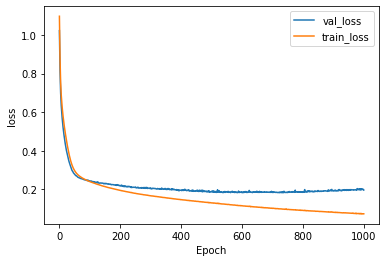

              precision    recall  f1-score   support

      normal       0.97      0.97      0.97       257
     suspect       0.76      0.72      0.74        39
pathological       0.92      0.96      0.94        23

    accuracy                           0.94       319
   macro avg       0.88      0.88      0.88       319
weighted avg       0.94      0.94      0.94       319



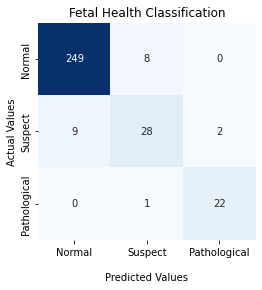

In [9]:
Y_pred_validate = model.predict(X_validate)
y_pred_c = np.argmax(Y_pred_validate, axis=1)
y_test_c = np.argmax(Y_validate, axis=1)

x = list(range(1000))
vy = training.history['val_loss']
ty = training.history['loss']

plt.plot( x, vy, label='val_loss')
plt.plot( x, ty, label='train_loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.show()

print(classification_report(y_test_c, y_pred_c, target_names=['normal', 'suspect', 'pathological'] ))

confusion = sb.heatmap(confusion_matrix(y_test_c, y_pred_c), square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
confusion.set_title("Fetal Health Classification")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
plt.show()

# Testing

              precision    recall  f1-score   support

      normal       0.98      0.99      0.98        83
     suspect       0.94      0.89      0.91        18
pathological       0.83      0.83      0.83         6

    accuracy                           0.96       107
   macro avg       0.92      0.90      0.91       107
weighted avg       0.96      0.96      0.96       107



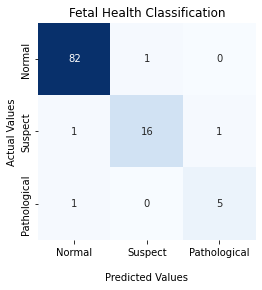

In [10]:
Y_pred_test = model.predict(X_test)
y_pred_c = np.argmax(Y_pred_test, axis=1)
y_test_c = np.argmax(Y_test, axis=1)

print(classification_report(y_test_c, y_pred_c, target_names=['normal', 'suspect', 'pathological'] ))

confusion = sb.heatmap(confusion_matrix(y_test_c, y_pred_c), square=True, annot=True, cmap='Blues', fmt='d', cbar=False )
confusion.set_title("Fetal Health Classification")
confusion.set_xlabel("\nPredicted Values")
confusion.set_ylabel("Actual Values")
confusion.xaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
confusion.yaxis.set_ticklabels(['Normal', 'Suspect', 'Pathological'])
plt.show()